In [1]:
import os, glob, math
import numpy as np
import pandas as pd
import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pyplot as plt
% matplotlib inline
% load_ext autoreload
% autoreload 2

In [2]:
import sys, os, glob
sys.path.append("./pyusct/")
from rfdata import RFdata
from scaler import RFScaler

In [3]:
LOCAL_PATH = "/media/yuhui/dea78678-112b-4f0f-acbf-4e9d1be35e351/nas/"
MOUNT_PATH = "/run/user/1000/gvfs/smb-share:server=azlab-fs01.local,share=東研究室/個人work/富井/"
MODEL_DIR = os.path.join(LOCAL_PATH, "PYUSCT_model/")
SIM_DIR = os.path.join(LOCAL_PATH, "nb_usctsim/sim_015/")

In [4]:
trials = sim_result_dirs = glob.glob(os.path.join(SIM_DIR, "trial*"))

In [5]:
rf = RFdata(trials[0])

###  Load plot function

In [6]:
import seaborn as sns

In [8]:
from utils import hist_evaluate, heatmap_fixT

### Plot raw full RF data

In [9]:
epsilon = 10e-10
offsets = np.arange(-100, 100, 1)
ix, iy = 53, 318

In [10]:
raw  = rf.amp

(5001, 256)


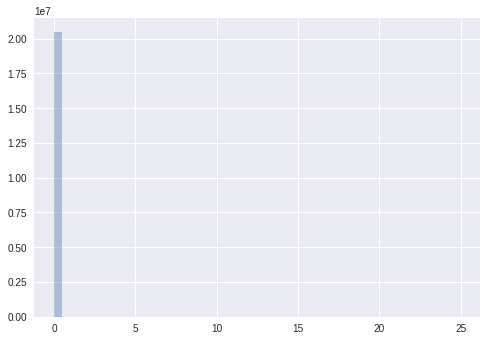

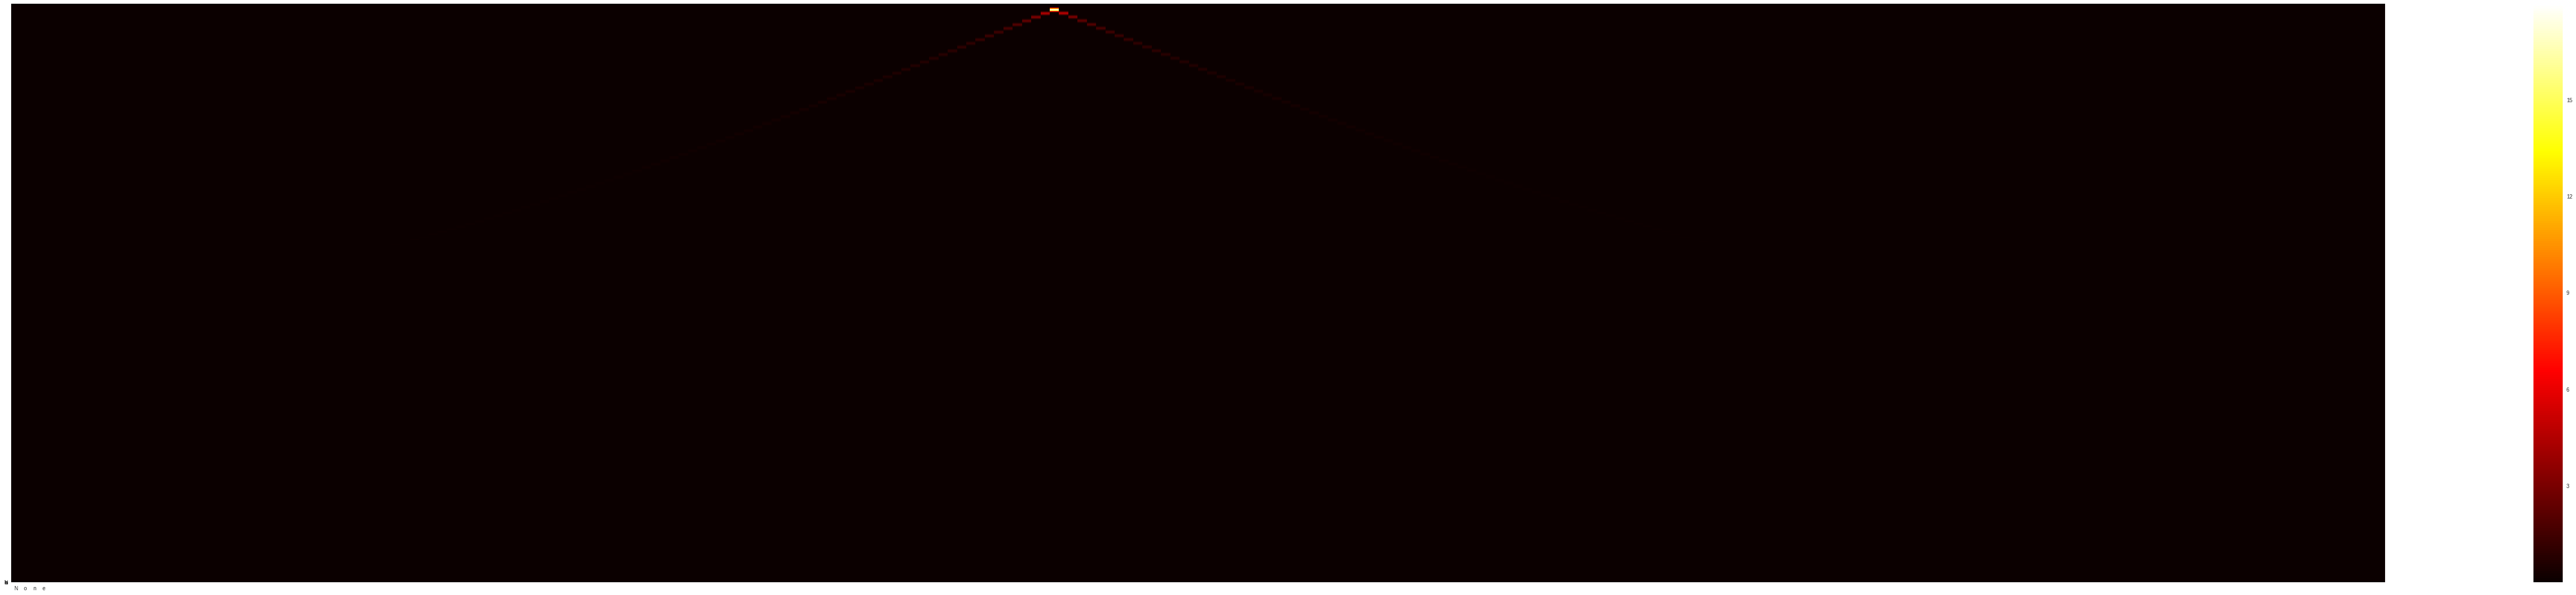

In [12]:
hist_evaluate(raw)
heatmap_fixT(raw, (100, 20))

#### Scaled

In [15]:
import pickle
scaler = pickle.load(open(os.path.join(MODEL_DIR, 'Scaler/Log_MinMax_RFScaler_ds028.pickle'), 'rb'))

In [16]:
scaled_data = scaler.transform(raw)

(5001, 256)


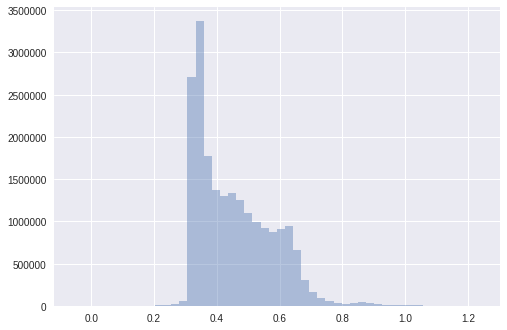

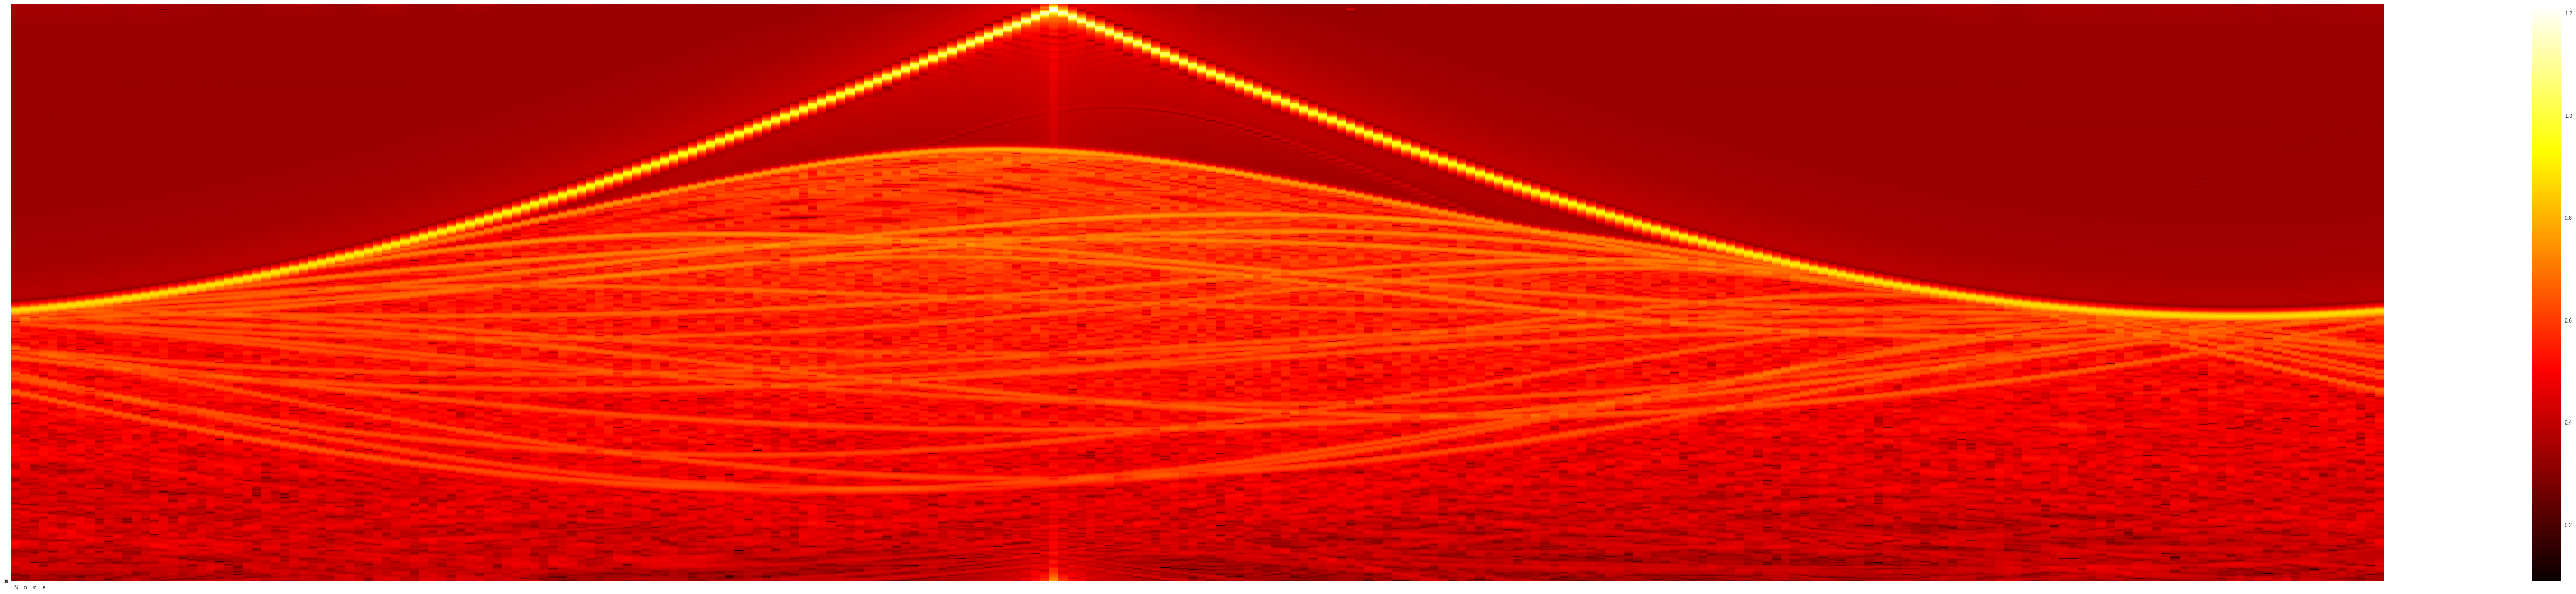

In [18]:
hist_evaluate(scaled_data)
heatmap_fixT(scaled_data, (100, 20))

## plot sample

In [61]:
_, sample_raw = rf.getPointSubset((ix, iy), offsets)

In [69]:
ix, iy = np.random.randint(1024, size=2)

##### sample_raw

In [70]:
ix, iy

(568, 660)

In [71]:
sample_raw.shape

(16, 256, 200)

(200, 256)


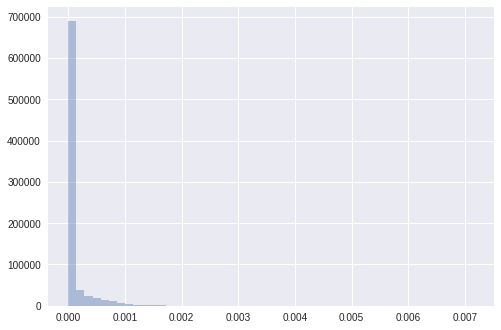

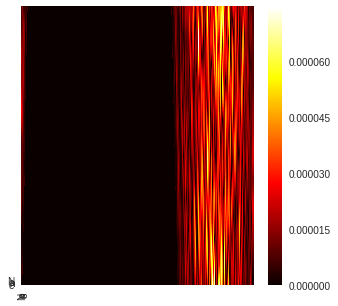

In [72]:
hist_evaluate(sample_raw)
heatmap_fixT(sample_raw)

##### sample_scaled

(200, 256)


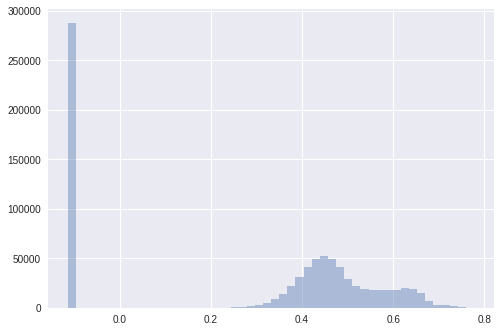

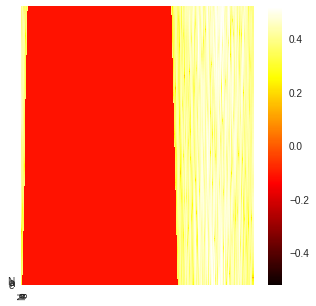

In [73]:
hist_evaluate(scaler.transform(sample_raw))
heatmap_fixT(scaler.transform(sample_raw))

####  sample AEed

In [74]:
import torch
from torch.autograd import Variable
from AE import RFFullDataset
from AE import Autoencoder
model = Autoencoder().cuda()
model.load_state_dict(torch.load(os.path.join(MODEL_DIR, 'AE/rf_conv_AE_Log_MinMax.pth')))

In [75]:
data = Variable(torch.from_numpy(sample_raw[np.newaxis,:,:,:])).cuda().float()
rec_X = model.forward(data).cpu().detach().numpy().squeeze()

(200, 256)


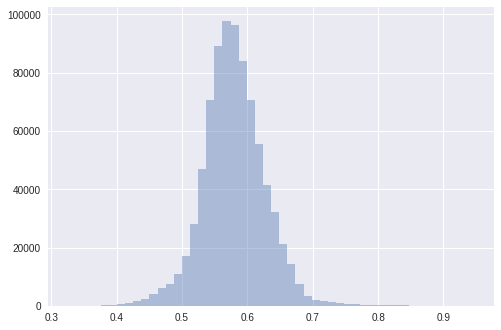

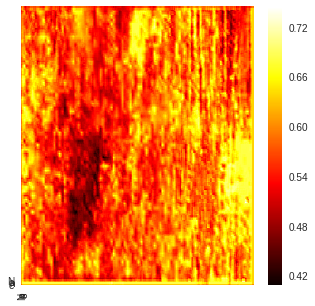

In [76]:
hist_evaluate(rec_X)
heatmap_fixT(rec_X)

#### sample PCAed

In [77]:
from sklearn.decomposition import IncrementalPCA

In [78]:
ipca = None
with open(os.path.join(LOCAL_PATH, "PYUSCT_model/PCA/iPCA_log_scaled.pickle"), "rb") as handle:
    ipca = pickle.load(handle)

In [79]:
sample_pca = sample_raw.reshape(1, -1)
rec_X = ipca.inverse_transform(ipca.transform(sample_pca))

(200, 256)


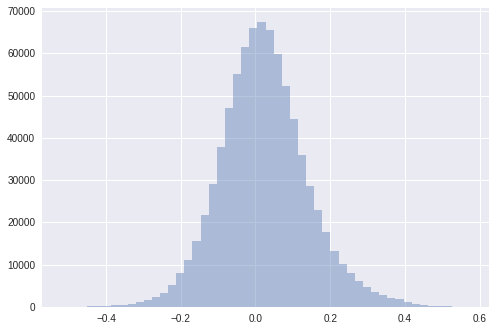

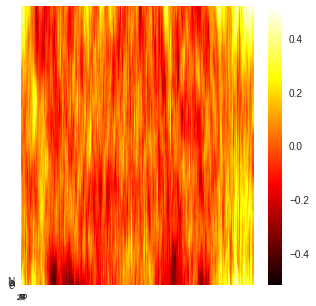

In [80]:
hist_evaluate(rec_X)
heatmap_fixT(rec_X.reshape(16,256,200))